In [41]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

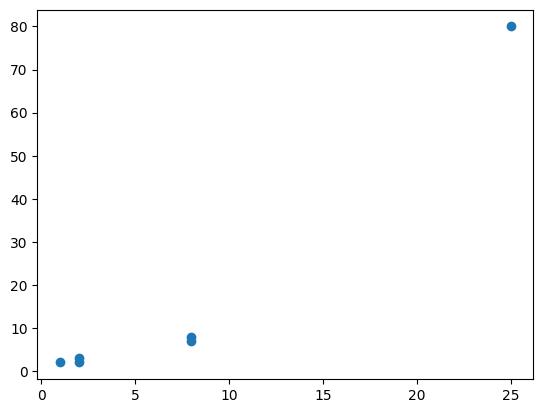

In [42]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [43]:
db = DBSCAN(eps=3, min_samples=2)

db.fit(X)

db.labels_

array([ 0,  0,  0,  1,  1, -1])

In [38]:
db = DBSCAN(eps=10, min_samples=2)

db.fit(X)
db.labels_

array([ 0,  0,  0,  0,  0, -1])

In [39]:
db = DBSCAN(eps=3, min_samples=3)

db.fit(X)
db.labels_

array([ 0,  0,  0, -1, -1, -1])

In [46]:
# Remove noise points (-1) because silhouette does not support them
mask = db.labels_ != -1

#array([ 0,  0,  0,  1,  1, -1])
#True, True, True, True, True, False

X_valid = X[mask]
clusters_valid = db.labels_[mask]

X_valid


# Compute silhouette score
if len(set(clusters_valid)) > 1:
    score = silhouette_score(X_valid, clusters_valid)
    print("Silhouette Score:", score)
else:
    print("Silhouette score cannot be computed (only one cluster).")

Silhouette Score: 0.8673031700276013


In [31]:
# Calculate Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_valid, clusters_valid)

print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.14119331464075346


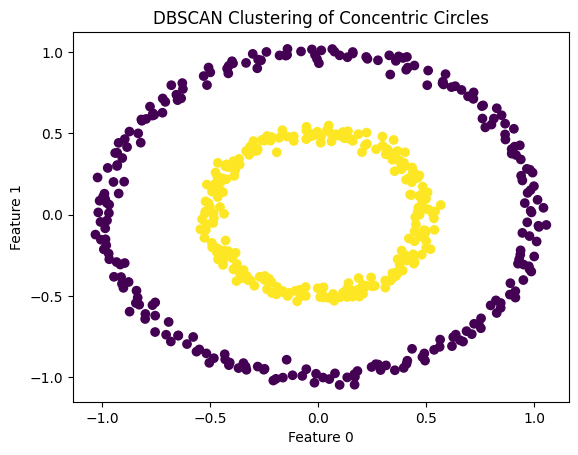

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

(2,3)(4,5)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [ ]:
# Remove noise points (-1) because silhouette does not support them
mask = clusters != -1

X_valid = X[mask]
clusters_valid = clusters[mask]

# Compute silhouette score
if len(set(clusters_valid)) > 1:
    score = silhouette_score(X_valid, clusters_valid)
    print("Silhouette Score:", score)
else:
    print("Silhouette score cannot be computed (only one cluster).")

Silhouette Score: 0.1132795293992707


In [ ]:
# Calculate Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_valid, clusters_valid)

print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 329.482494593832
